In [8]:
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import datetime
 
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
import pickle
from scipy import stats    


In [9]:
df= pd.read_excel(r'feature_engineering_V5.xlsx')

In [10]:
df.isna().sum()

File_Name                 0
Car_Name                  0
Model_Year                0
Price                     0
Car_Color                 0
Fuel_Type                 0
Car_Origin                0
Driving_License           0
Lime_Type                 0
Glass_Type                0
Motor_Power               0
Passenger_Number        778
Payment_Method            0
Shown_Status              0
Extras                    0
Age                       0
Car_Speedometer1       2183
New_Previous_Owners       0
New_Column_carName        0
dtype: int64

In [11]:
mean_previous_owners = df['New_Previous_Owners'].mean()
df['New_Previous_Owners'].fillna(mean_previous_owners, inplace=True)

In [12]:
df.head(2)

File_Name     Car_Name  Model_Year   Price Car_Color Fuel_Type Car_Origin  \
0  500118.txt  كيا اوبتيما        2014  100000     white    petrol    private   
1  500163.txt  كيا سورينتو        2007   60000      Grey    diesel    private   

  Driving_License       Lime_Type  Glass_Type  Motor_Power Passenger_Number  \
0     Palestinian       Automatic  electronic         2000                4   
1     Palestinian  Semi automatic  electronic         2500                7   

  Payment_Method      Shown_Status   Extras  Age  Car_Speedometer1  \
0           cash         For_sale   sunroof    9           75000.0   
1    Installment  Sell_or_exchange  sunroof   16          130000.0   

   New_Previous_Owners New_Column_carName  
0                    1                كيا  
1                    2                كيا

In [13]:
mean_value = df['Car_Speedometer1'].mean()
mean_value

82201.54533219397

In [14]:
df['Car_Speedometer1'].fillna(int(mean_value), inplace=True)         #           هلالي   رام    ركاب

In [15]:
# List of texts I want to delete
texts_to_remove = ['+','1998','2000','4800','2013','مع باب خلفي','2007','كوووورسا بسعر ممتاز','2016','- مع بانوراما وبصمه وشاشة - كاميرا',
             '2016','٢٠١٦','2011','تنك مياه','١٩٩٩','diesel privat','Compass','2012','فل اضافات','x1','اصل الماني  بانوراما بصمه شاشه كاميرا',
                  '١٢١٨','١١١٧','٢٠١٦','2017','1999','١٩٩٨','٢٠٠٦','2006','1988','1997','سكودا كودياك  Xdrive  X3..28i',
                  '2001','اكسنت كوري بصمه','تعديل ار','1999','2005','٢٠١٥','2004','1985','2008','2014','2003','1993','2009',
                  'd','٢٠١٥','٢٠١٠','2019','2010','١٩٨٣','٢٠١٩','1990','٢٠٠٣','connect','2018','2015','1983','2000','1983',
                  '٢٠١٢','2006','2/4','ابواب 6']

for text in texts_to_remove:
    df['Car_Name'] = df['Car_Name'].str.replace(text, '')

df['Car_Name'] = df['Car_Name'].str.strip()

C:\Users\Alaa_Abdallah\AppData\Local\Temp\ipykernel_12004\3647292599.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Car_Name'] = df['Car_Name'].str.replace(text, '')
C:\Users\Alaa_Abdallah\AppData\Local\Temp\ipykernel_12004\3647292599.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Car_Name'] = df['Car_Name'].str.replace(text, '')


In [16]:
df['Passenger_Number'].unique()

array(['4', '7', nan, '5', '4+1', '8', '6', '7,+ 1', '7:1', '1+7', '1+4',
       '2', '6+1', '6±1', '22', '1', '5+1', '5+2', 'مثال: 4 + 1', '7.1',
       '7 =1', '7+1', '1+2', '6x1', '2/1', '8+1', '4+2', '104', '4\\1',
       '000', '3', 'اكثر من 10', '9'], dtype=object)

In [17]:
texts_to_remove = [ ]

for text in texts_to_remove:
    df['Car_Name'] = df['Car_Name'].str.replace(text, '')

df['Car_Name'] = df['Car_Name'].str.strip()

In [18]:
df['Passenger_Number'] = df['Passenger_Number'].str.strip()
df['Passenger_Number'].replace({
    '000':'0',
     '4+1':'5',
    '7,+ 1':'8',
    '1+7':'8',
    '1+4':'5',
    '6+1':'7',
    '6±1':'7',
    '5+1':'6',
    '5+2':'7',
    '7.1':'8',
    'مثال: 4 + 1':'5',
    '7 =1':'8',
    '7+1':'8',
    '1+2':'3',
    '6x1':'7',
    '2/1':'5',
    '8+1':'9',
    '4+2':'6',
    '104':'5',
    '4\\1':'5',
    '7:1':'8',
    'اكثر من 10':'5',          }, inplace=True)

In [19]:
df['Passenger_Number'] = pd.to_numeric(df['Passenger_Number'], errors='coerce')

# Fill NaN values with the mean of the column
mean_value = df['Passenger_Number'].mean()
df['Passenger_Number'].fillna(mean_value, inplace=True)

# Convert to integers
df['Passenger_Number'] = df['Passenger_Number'].astype(int)

In [20]:
mean_value = df['Passenger_Number'].mean()
int(mean_value)

4

In [21]:
df['Passenger_Number'].fillna(int(mean_value), inplace=True)

In [22]:
df['Passenger_Number'] = pd.to_numeric(df['Passenger_Number'], errors='coerce').astype(int)

In [23]:
df['Passenger_Number'].unique()

array([ 4,  7,  5,  8,  6,  2, 22,  1,  3,  9,  0])

In [17]:
df.to_excel('feature_engineering_newV6.xlsx', index=False)

In [24]:
 df.Car_Color.value_counts() 

white             2117
Grey              2035
black              950
blue               430
red                388
navy blue          214
green              161
yellow             160
brown              125
petroleum          106
beige               72
several colors      55
orange              35
purple              16
Name: Car_Color, dtype: int64

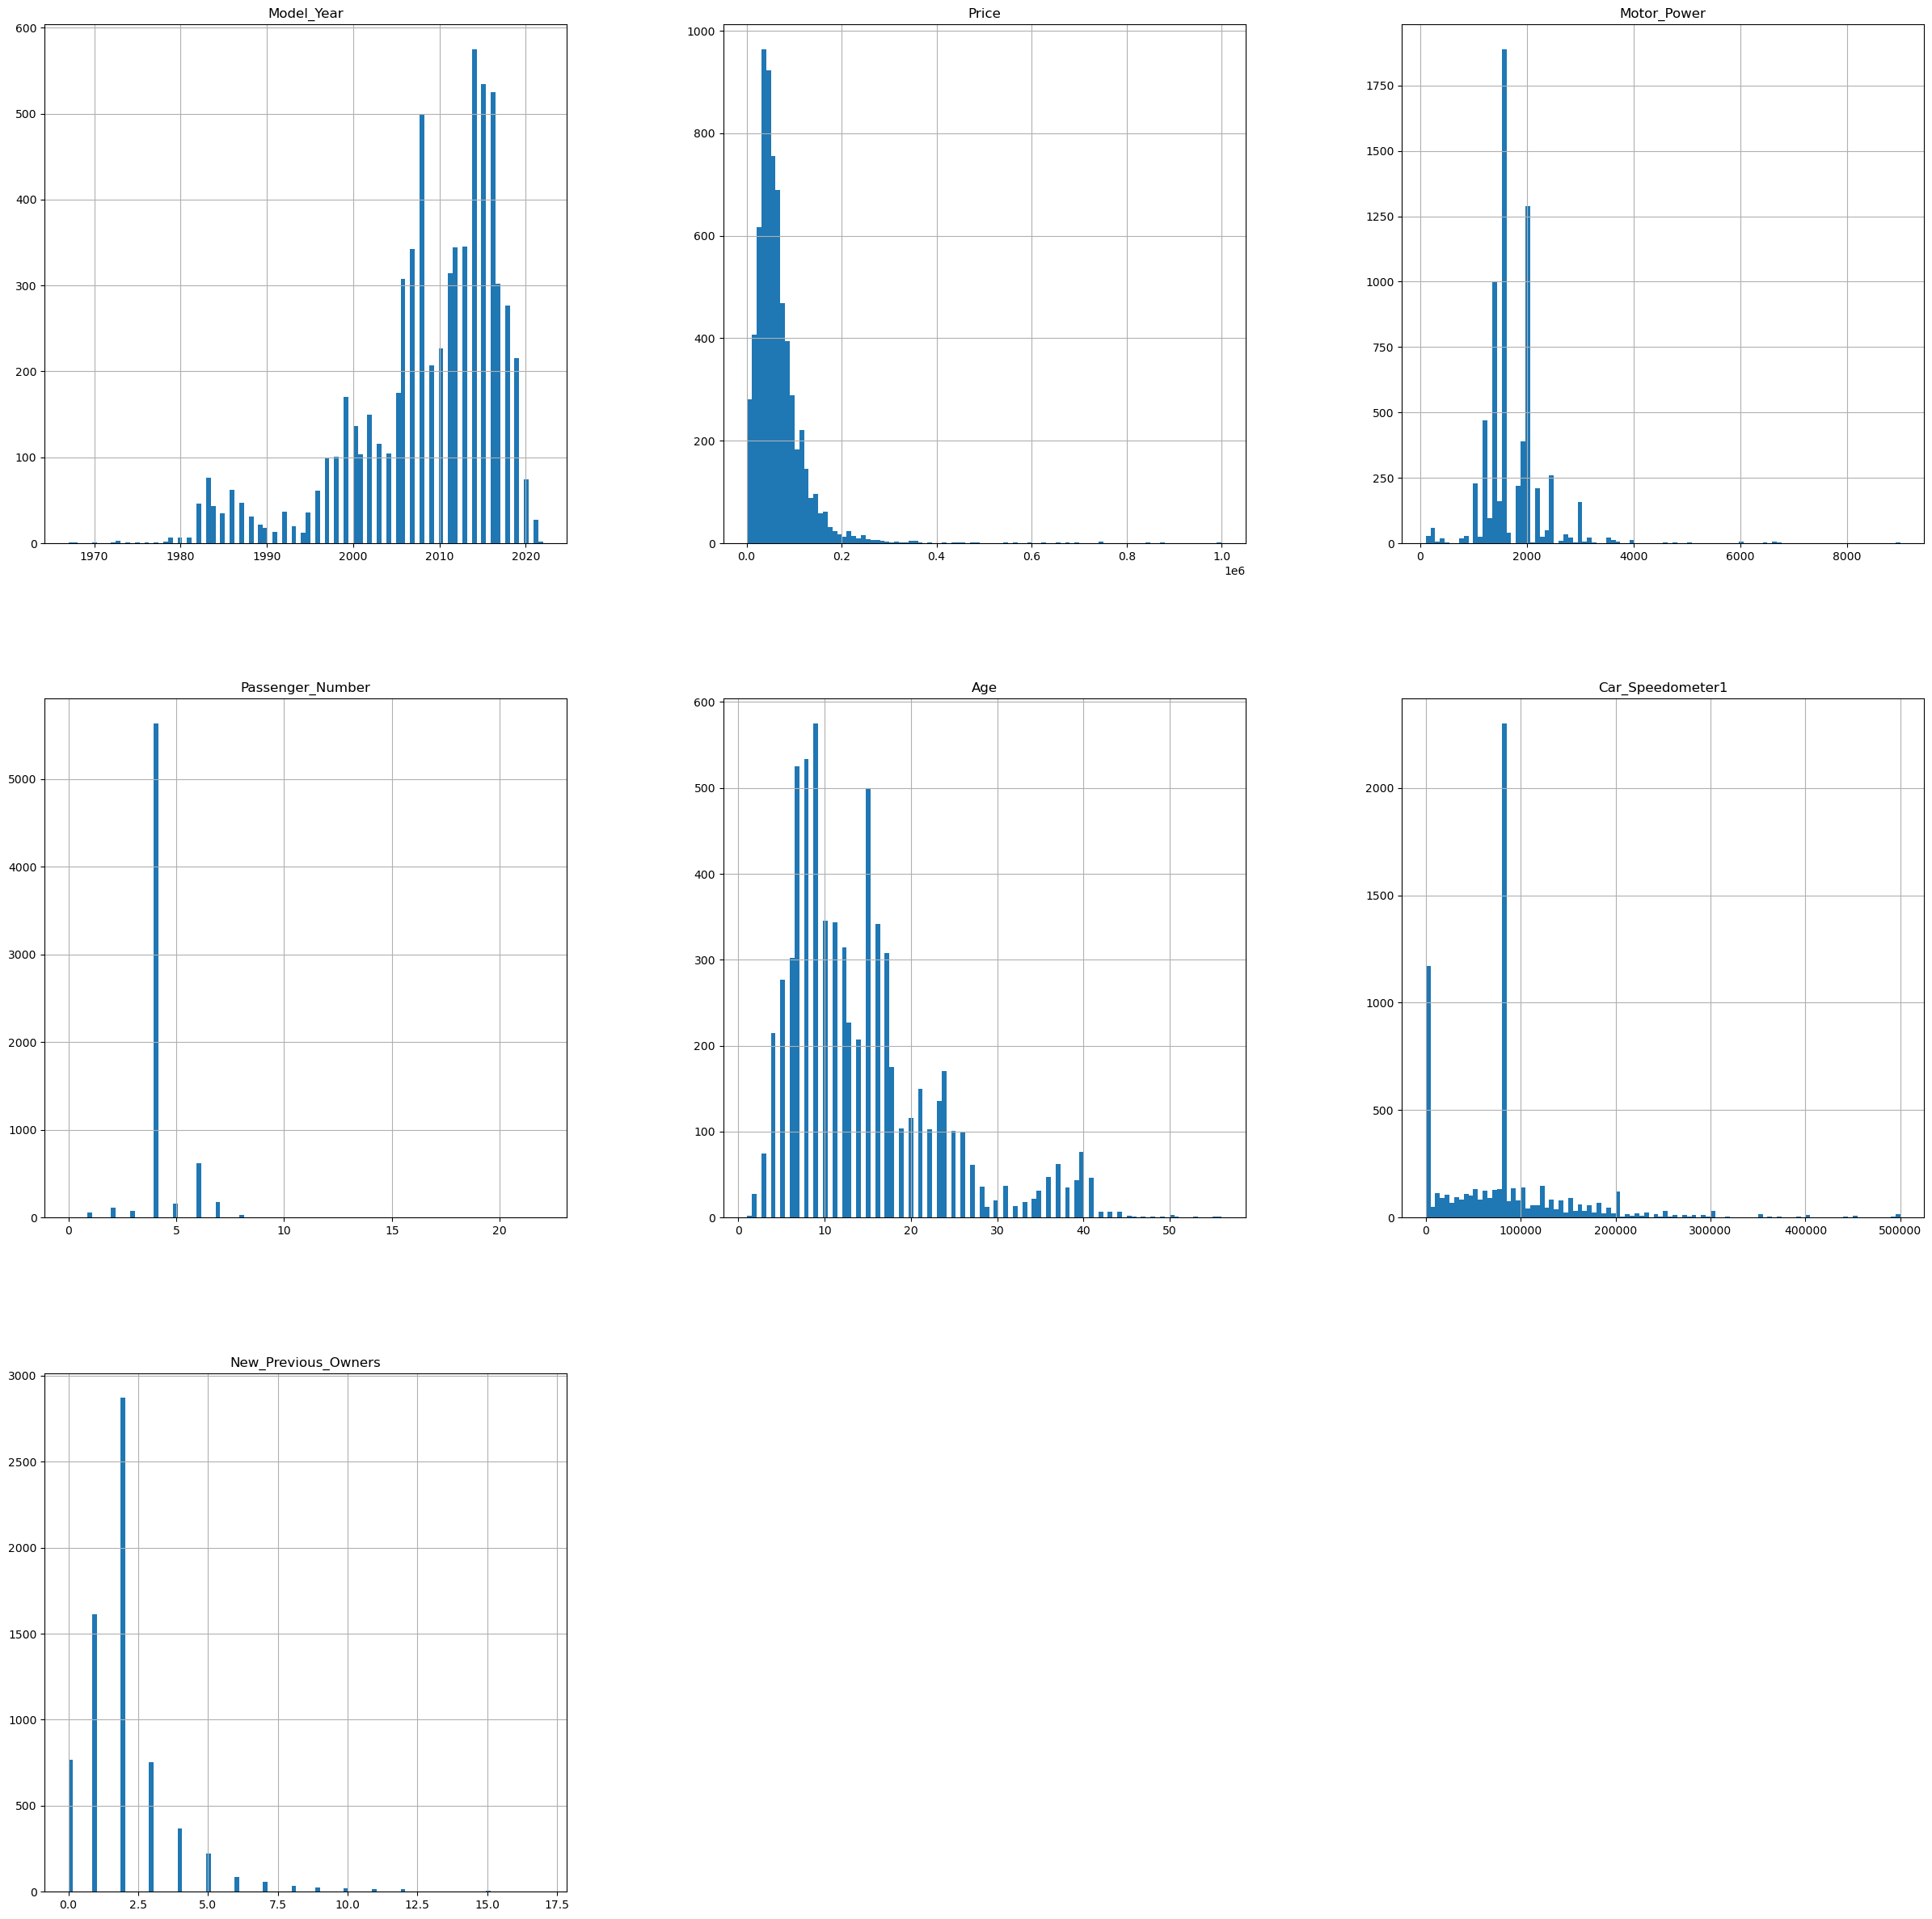

In [25]:
import matplotlib.pyplot as plt  # Import the pyplot module from Matplotlib
df.hist(bins=100,figsize=(30,30))
plt.show() 

In [26]:
df['New_Column_carName'].value_counts()

فولكسفاجن                1160
هونداي                   1046
كيا                       827
سكودا                     770
اوبل                      493
مرسيدس                    367
بيجو                      330
سيت                       261
فورد                      233
بي ام دبليو               219
فيات                      149
ستروين                     99
ميتسوبيشي                  95
شفروليه                    88
دايو                       84
اودي                       84
سوبارو                     83
رينو                       63
نيسان                      47
تويوتا                     45
هوندا                      44
دراجة نارية                43
مازدا                      37
جييب                       34
فولفو                      26
أفيكو                      26
روفر                       20
ايسوزو                     19
داف                        16
سانغ يونغ                  15
داتشيا                     11
شاحنة                       8
جي ام سي                    5
باص       

In [27]:
# Assigning unique labels to each brand
df['Brand_Unique_Label'] = pd.factorize(df['New_Column_carName'])[0]

In [28]:
# Binary encoding
df['Sunroof_Presence'] = (df['Extras'] == 'sunroof').astype(int)

In [29]:
df.isna().sum()

File_Name              0
Car_Name               0
Model_Year             0
Price                  0
Car_Color              0
Fuel_Type              0
Car_Origin             0
Driving_License        0
Lime_Type              0
Glass_Type             0
Motor_Power            0
Passenger_Number       0
Payment_Method         0
Shown_Status           0
Extras                 0
Age                    0
Car_Speedometer1       0
New_Previous_Owners    0
New_Column_carName     0
Brand_Unique_Label     0
Sunroof_Presence       0
dtype: int64

In [30]:
df.head(2)

File_Name     Car_Name  Model_Year   Price Car_Color Fuel_Type Car_Origin  \
0  500118.txt  كيا اوبتيما        2014  100000     white    petrol    private   
1  500163.txt  كيا سورينتو        2007   60000      Grey    diesel    private   

  Driving_License       Lime_Type  Glass_Type  ...  Passenger_Number  \
0     Palestinian       Automatic  electronic  ...                 4   
1     Palestinian  Semi automatic  electronic  ...                 7   

   Payment_Method      Shown_Status   Extras Age  Car_Speedometer1  \
0            cash         For_sale   sunroof   9           75000.0   
1     Installment  Sell_or_exchange  sunroof  16          130000.0   

   New_Previous_Owners  New_Column_carName Brand_Unique_Label  \
0                    1                 كيا                  0   
1                    2                 كيا                  0   

   Sunroof_Presence  
0                 1  
1                 1  

[2 rows x 21 columns]

In [31]:
df.Payment_Method.value_counts()

cash           4323
Installment    2541
Name: Payment_Method, dtype: int64

In [32]:
df.columns

Index(['File_Name', 'Car_Name', 'Model_Year', 'Price', 'Car_Color',
       'Fuel_Type', 'Car_Origin', 'Driving_License', 'Lime_Type', 'Glass_Type',
       'Motor_Power', 'Passenger_Number', 'Payment_Method', 'Shown_Status',
       'Extras', 'Age', 'Car_Speedometer1', 'New_Previous_Owners',
       'New_Column_carName', 'Brand_Unique_Label', 'Sunroof_Presence'],
      dtype='object')

In [33]:
df.Fuel_Type.value_counts()

petrol         3970
diesel         2870
Hybrid           23
electricity       1
Name: Fuel_Type, dtype: int64

In [34]:
df = df[df['Fuel_Type'] != 'electricity']

In [35]:
df = pd.get_dummies(df, columns=['Car_Color'], prefix='color')

In [36]:
df = pd.get_dummies(df, columns=['Brand_Unique_Label'], prefix='BUL')

In [37]:
df = pd.get_dummies(df, columns=['Payment_Method'], prefix='Payment')
df = pd.get_dummies(df, columns=['Fuel_Type'], prefix='Fuel')
df = pd.get_dummies(df, columns=['Car_Origin'], prefix='CarOrigin')
df = pd.get_dummies(df, columns=['Driving_License'], prefix='DL')
df = pd.get_dummies(df, columns=['Lime_Type'], prefix='LT')
df = pd.get_dummies(df, columns=['Glass_Type'], prefix='Glass')

In [38]:
df = pd.get_dummies(df, columns=['Shown_Status'], prefix='Shown')

In [39]:
df.columns

Index(['File_Name', 'Car_Name', 'Model_Year', 'Price', 'Motor_Power',
       'Passenger_Number', 'Extras', 'Age', 'Car_Speedometer1',
       'New_Previous_Owners', 'New_Column_carName', 'Sunroof_Presence',
       'color_Grey', 'color_beige', 'color_black', 'color_blue', 'color_brown',
       'color_green', 'color_navy blue', 'color_orange', 'color_petroleum',
       'color_purple', 'color_red', 'color_several colors', 'color_white',
       'color_yellow', 'BUL_0', 'BUL_1', 'BUL_2', 'BUL_3', 'BUL_4', 'BUL_5',
       'BUL_6', 'BUL_7', 'BUL_8', 'BUL_9', 'BUL_10', 'BUL_11', 'BUL_12',
       'BUL_13', 'BUL_14', 'BUL_15', 'BUL_16', 'BUL_17', 'BUL_18', 'BUL_19',
       'BUL_20', 'BUL_21', 'BUL_22', 'BUL_23', 'BUL_24', 'BUL_25', 'BUL_26',
       'BUL_27', 'BUL_28', 'BUL_29', 'BUL_30', 'BUL_31', 'BUL_32', 'BUL_33',
       'BUL_34', 'BUL_35', 'BUL_36', 'BUL_37', 'BUL_38', 'BUL_39', 'BUL_40',
       'Payment_Installment', 'Payment_cash', 'Fuel_Hybrid', 'Fuel_diesel',
       'Fuel_petrol', 'CarOri

In [40]:
df.to_excel('feature_engineering_the_last_version.xlsx', index=False)

In [41]:
 new_df = df[['Price', 'Motor_Power',
       'Passenger_Number', 'Age', 'Car_Speedometer1',
       'New_Previous_Owners', 'Sunroof_Presence','color_Grey', 'color_beige', 'color_black', 
             'color_blue', 'color_brown',
             'color_green', 'color_navy blue', 'color_orange', 'color_petroleum',
       'color_purple', 'color_red', 'color_several colors', 'color_white',
       'color_yellow', 'BUL_0', 'BUL_1', 'BUL_2', 'BUL_3', 'BUL_4', 'BUL_5',
       'BUL_6', 'BUL_7', 'BUL_8', 'BUL_9', 'BUL_10', 'BUL_11', 'BUL_12',
       'BUL_13', 'BUL_14', 'BUL_15', 'BUL_16', 'BUL_17', 'BUL_18', 'BUL_19',
       'BUL_20', 'BUL_21', 'BUL_22', 'BUL_23', 'BUL_24', 'BUL_25', 'BUL_26',
       'BUL_27', 'BUL_28', 'BUL_29', 'BUL_30', 'BUL_31', 'BUL_32', 'BUL_33',
       'BUL_34', 'BUL_35', 'BUL_36', 'BUL_37', 'BUL_38', 'BUL_39', 'BUL_40',
       'Payment_Installment', 'Payment_cash', 'Fuel_Hybrid', 'Fuel_diesel',
       'Fuel_petrol', 'CarOrigin_Leasing', 'CarOrigin_Tegari',
       'CarOrigin_governmental', 'CarOrigin_private', 'CarOrigin_public',
       'CarOrigin_training', 'DL_Non_Palestinian', 'DL_Palestinian',
       'LT_Automatic', 'LT_Semi automatic', 'LT_normal', 'Glass_Manual',
       'Glass_electronic', 'Shown_For_sale ', 'Shown_Sell_or_exchange',
       'Shown_To_switch ']]
new_df #masking

Price  Motor_Power  Passenger_Number  Age  Car_Speedometer1  \
0     100000         2000                 4    9           75000.0   
1      60000         2500                 7   16          130000.0   
2      43500         1600                 4   17           82201.0   
3       5500          906                 4   41           82201.0   
4      54000         1200                 4    9           38000.0   
...      ...          ...               ...  ...               ...   
6858   50000         1600                 4   11           82201.0   
6860   48000         2400                 7   21               0.0   
6861   87000         1600                 4    5           50000.0   
6862  126000         2200                 6    6             100.0   
6863   28000         2500                 7   22           82201.0   

      New_Previous_Owners  Sunroof_Presence  color_Grey  color_beige  \
0                       1                 1           0            0   
1                       2                 1           1            0   
2                       2                 0           1            0   
3                       0                 0           0            1   
4                       2                 0           1            0   
...                   ...               ...         ...          ...   
6858                    1                 0           0            0   
6860                    5                 0           0            0   
6861                    0                 0           1            0   
6862                    2                 1           0            0   
6863                    5                 0           0            0   

      color_black  ...  DL_Non_Palestinian  DL_Palestinian  LT_Automatic  \
0               0  ...                   0               1             1   
1               0  ...                   0               1             0   
2               0  ...                   0               1             1   
3               0  ...                   0               1             0   
4               0  ...                   0               1             1   
...           ...  ...                 ...             ...           ...   
6858            0  ...                   0               1             1   
6860            0  ...                   0               1             0   
6861            0  ...                   0               1             0   
6862            0  ...                   0               1             1   
6863            0  ...                   0               1             0   

      LT_Semi automatic  LT_normal  Glass_Manual  Glass_electronic  \
0                     0          0             0                 1   
1                     1          0             0                 1   
2                     0          0             0                 1   
3                     0          1             1                 0   
4                     0          0             0                 1   
...                 ...        ...           ...               ...   
6858                  0          0             0                 1   
6860                  0          1             0                 1   
6861                  0          1             0                 1   
6862                  0          0             0                 1   
6863                  0          1             0                 1   

      Shown_For_sale   Shown_Sell_or_exchange  Shown_To_switch   
0                   1                       0                 0  
1                   0                       1                 0  
2                   1                       0                 0  
3                   1                       0                 0  
4                   1                       0                 0  
...               ...                     ...               ...  
6858                1                       0                 0  
6860               

In [42]:
Y= new_df['Price']
X= new_df [[ 'Motor_Power',
       'Passenger_Number', 'Age', 'Car_Speedometer1',
       'New_Previous_Owners', 'Sunroof_Presence','color_Grey', 'color_beige', 'color_black', 
             'color_blue', 'color_brown',
             'color_green', 'color_navy blue', 'color_orange', 'color_petroleum',
       'color_purple', 'color_red', 'color_several colors', 'color_white',
       'color_yellow', 'BUL_0', 'BUL_1', 'BUL_2', 'BUL_3', 'BUL_4', 'BUL_5',
       'BUL_6', 'BUL_7', 'BUL_8', 'BUL_9', 'BUL_10', 'BUL_11', 'BUL_12',
       'BUL_13', 'BUL_14', 'BUL_15', 'BUL_16', 'BUL_17', 'BUL_18', 'BUL_19',
       'BUL_20', 'BUL_21', 'BUL_22', 'BUL_23', 'BUL_24', 'BUL_25', 'BUL_26',
       'BUL_27', 'BUL_28', 'BUL_29', 'BUL_30', 'BUL_31', 'BUL_32', 'BUL_33',
       'BUL_34', 'BUL_35', 'BUL_36', 'BUL_37', 'BUL_38', 'BUL_39', 'BUL_40',
       'Payment_Installment', 'Payment_cash', 'Fuel_Hybrid', 'Fuel_diesel',
       'Fuel_petrol', 'CarOrigin_Leasing', 'CarOrigin_Tegari',
       'CarOrigin_governmental', 'CarOrigin_private', 'CarOrigin_public',
       'CarOrigin_training', 'DL_Non_Palestinian', 'DL_Palestinian',
       'LT_Automatic', 'LT_Semi automatic', 'LT_normal', 'Glass_Manual',
       'Glass_electronic', 'Shown_For_sale ', 'Shown_Sell_or_exchange',
       'Shown_To_switch ']]

In [43]:
#X_train.info()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.3973679549603679

In [47]:
X_train.shape

(4804, 82)

In [109]:
#standardScaler = StandardScaler()         #X_train, X_test, y_train, y_test
#standardScaler.fit(X_train)
#X_train = standardScaler.transform(X_train)
#X_test = standardScaler.transform(X_test)

In [48]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.46454284167720494

In [ ]:
#another one

In [52]:
lm=LinearRegression()     
x_train=new_df [[ 'Motor_Power',
       'Passenger_Number', 'Age', 'Car_Speedometer1',
       'New_Previous_Owners', 'Sunroof_Presence','color_Grey', 'color_beige', 'color_black', 
             'color_blue', 'color_brown',
             'color_green', 'color_navy blue', 'color_orange', 'color_petroleum',
       'color_purple', 'color_red', 'color_several colors', 'color_white',
       'color_yellow', 'BUL_0', 'BUL_1', 'BUL_2', 'BUL_3', 'BUL_4', 'BUL_5',
       'BUL_6', 'BUL_7', 'BUL_8', 'BUL_9', 'BUL_10', 'BUL_11', 'BUL_12',
       'BUL_13', 'BUL_14', 'BUL_15', 'BUL_16', 'BUL_17', 'BUL_18', 'BUL_19',
       'BUL_20', 'BUL_21', 'BUL_22', 'BUL_23', 'BUL_24', 'BUL_25', 'BUL_26',
       'BUL_27', 'BUL_28', 'BUL_29', 'BUL_30', 'BUL_31', 'BUL_32', 'BUL_33',
       'BUL_34', 'BUL_35', 'BUL_36', 'BUL_37', 'BUL_38', 'BUL_39', 'BUL_40',
       'Payment_Installment', 'Payment_cash', 'Fuel_Hybrid', 'Fuel_diesel',
       'Fuel_petrol', 'CarOrigin_Leasing', 'CarOrigin_Tegari',
       'CarOrigin_governmental', 'CarOrigin_private', 'CarOrigin_public',
       'CarOrigin_training', 'DL_Non_Palestinian', 'DL_Palestinian',
       'LT_Automatic', 'LT_Semi automatic', 'LT_normal', 'Glass_Manual',
       'Glass_electronic', 'Shown_For_sale ', 'Shown_Sell_or_exchange',
       'Shown_To_switch ']]
y_train=new_df['Price'] 
lm.fit(x_train,y_train) 

LinearRegression()

In [53]:
#get the coefficients of the model               FROM G.D
["{:.5f}".format(x) for x in lm.coef_]

['12.85956',
 '4342.07974',
 '-3170.59588',
 '-0.01916',
 '-1470.52938',
 '17075.35281',
 '-2824.30656',
 '638.40759',
 '1639.79831',
 '-1809.60016',
 '153.17015',
 '-8809.04049',
 '-7598.94489',
 '17925.70156',
 '1058.90709',
 '-4123.51762',
 '-1119.36116',
 '1271.22779',
 '3887.34291',
 '-289.78452',
 '-19160.35875',
 '-18057.32125',
 '187.71688',
 '-24640.32034',
 '41529.15434',
 '-8187.05651',
 '25850.79200',
 '-21553.12396',
 '-6418.91533',
 '-397.50210',
 '214.70641',
 '-19436.99356',
 '-9162.23075',
 '-26459.34665',
 '1040.90429',
 '39466.61421',
 '-47357.06663',
 '-22361.05046',
 '88971.56270',
 '10368.02501',
 '-4553.35734',
 '-35590.46161',
 '-2942.78008',
 '49110.14074',
 '13290.66566',
 '4098.52339',
 '13109.56053',
 '12449.60884',
 '21240.32360',
 '1264.39774',
 '-15460.17462',
 '-74762.21210',
 '629.62907',
 '51192.12961',
 '-14493.46666',
 '-25330.97455',
 '8080.86670',
 '-15070.83088',
 '34429.26615',
 '-43506.84162',
 '38377.79786',
 '727.43700',
 '-727.43700',
 '8832.

In [54]:
#get the intercept value
lm.intercept_

64884.08365757674

In [55]:
pickle.dump(model, open('./model.sav','wb'))
#sav file -> binary file 

In [56]:
# if you want to load to model from the storage 
loaded_model = pickle.load(open('./modell.sav','rb'))

In [ ]:
#use the model to predit
#note the predict function assumes a 2D array where each line is a sample to predict for 
#x=np.array([ 'Motor_Power',
   #    'Passenger_Number', 'Age', 'Car_Speedometer1',
    #   'New_Previous_Owners', 'Sunroof_Presence','color_Grey', 'color_beige', 'color_black', 
     #        'color_blue', 'color_brown',
      #       'color_green', 'color_navy blue', 'color_orange', 'color_petroleum',
  #     'color_purple', 'color_red', 'color_several colors', 'color_white',
   #    'color_yellow', 'BUL_0', 'BUL_1', 'BUL_2', 'BUL_3', 'BUL_4', 'BUL_5',
    #   'BUL_6', 'BUL_7', 'BUL_8', 'BUL_9', 'BUL_10', 'BUL_11', 'BUL_12',
     #  'BUL_13', 'BUL_14', 'BUL_15', 'BUL_16', 'BUL_17', 'BUL_18', 'BUL_19',
      # 'BUL_20', 'BUL_21', 'BUL_22', 'BUL_23', 'BUL_24', 'BUL_25', 'BUL_26',
  #     'BUL_27', 'BUL_28', 'BUL_29', 'BUL_30', 'BUL_31', 'BUL_32', 'BUL_33',
   #    'BUL_34', 'BUL_35', 'BUL_36', 'BUL_37', 'BUL_38', 'BUL_39', 'BUL_40',
    #   'Payment_Installment', 'Payment_cash', 'Fuel_Hybrid', 'Fuel_diesel',
     #  'Fuel_petrol', 'CarOrigin_Leasing', 'CarOrigin_Tegari',
      # 'CarOrigin_governmental', 'CarOrigin_private', 'CarOrigin_public',
 #      'CarOrigin_training', 'DL_Non_Palestinian', 'DL_Palestinian',
  #     'LT_Automatic', 'LT_Semi automatic', 'LT_normal', 'Glass_Manual',
   #    'Glass_electronic', 'Shown_For_sale ', 'Shown_Sell_or_exchange',
    #   'Shown_To_switch ' ]).reshape(1,82) # -> 2D use reshape


#result= loaded_model.predict(x)
#if x.shape[0]==1:
 #   result=result[0]
#print(result)